In [8]:
!pip list

Package                  Version
------------------------ ---------
absl-py                  1.4.0
astor                    0.8.1
backcall                 0.2.0
CacheControl             0.12.11
cached-property          1.5.2
cachetools               4.2.4
certifi                  2021.5.30
charset-normalizer       2.0.12
click                    8.0.4
colorama                 0.4.5
cycler                   0.11.0
dataclasses              0.8
decorator                4.4.2
entrypoints              0.3
firebase-admin           5.4.0
Flask                    2.0.3
gast                     0.2.2
gcloud                   0.17.0
google-api-core          2.8.2
google-api-python-client 2.52.0
google-auth              2.17.3
google-auth-httplib2     0.1.0
google-cloud-core        2.3.1
google-cloud-firestore   2.5.3
google-cloud-storage     2.0.0
google-crc32c            1.3.0
google-pasta             0.2.0
google-resumable-media   2.3.3
googleapis-common-protos 1.56.3
grpcio                   

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import tensorflow as tf
import cv2, os, gc, glob
from tqdm import tqdm

from tensorflow.keras import layers, models

import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense
from keras.optimizers import Adam
from keras.utils import to_categorical, np_utils

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

In [10]:
os.listdir('dataset2')

['accident', 'normal']

In [11]:
# Image paths

imagePaths = []
for dirname, _, filenames in os.walk('dataset2'):
    for filename in filenames:
        if (filename[-3:] == 'jpg'):
            imagePaths.append(os.path.join(dirname, filename))

In [12]:
# Data - Label

Data = []
Target = []
resize = 225


cat = {'accident': 'accident',
       'normal': 'normal'}


for imagePath in tqdm(imagePaths):
    label = imagePath.split(os.path.sep)[-2]
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (resize, resize)) /255
    

    Data.append(image)
    Target.append(cat[label])

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 447/447 [00:02<00:00, 174.99it/s]


D:\Software_Installations\anaconda\envs\tf1.5\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


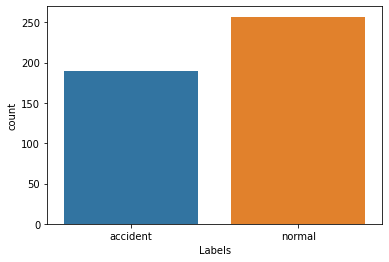

accident: 190
normal: 257


In [13]:
# Count by Label

df = pd.DataFrame(Target,columns=['Labels'])
sns.countplot(df['Labels'])
plt.show()



print('accident:',Target.count('accident'))
print('normal:',Target.count('normal'))

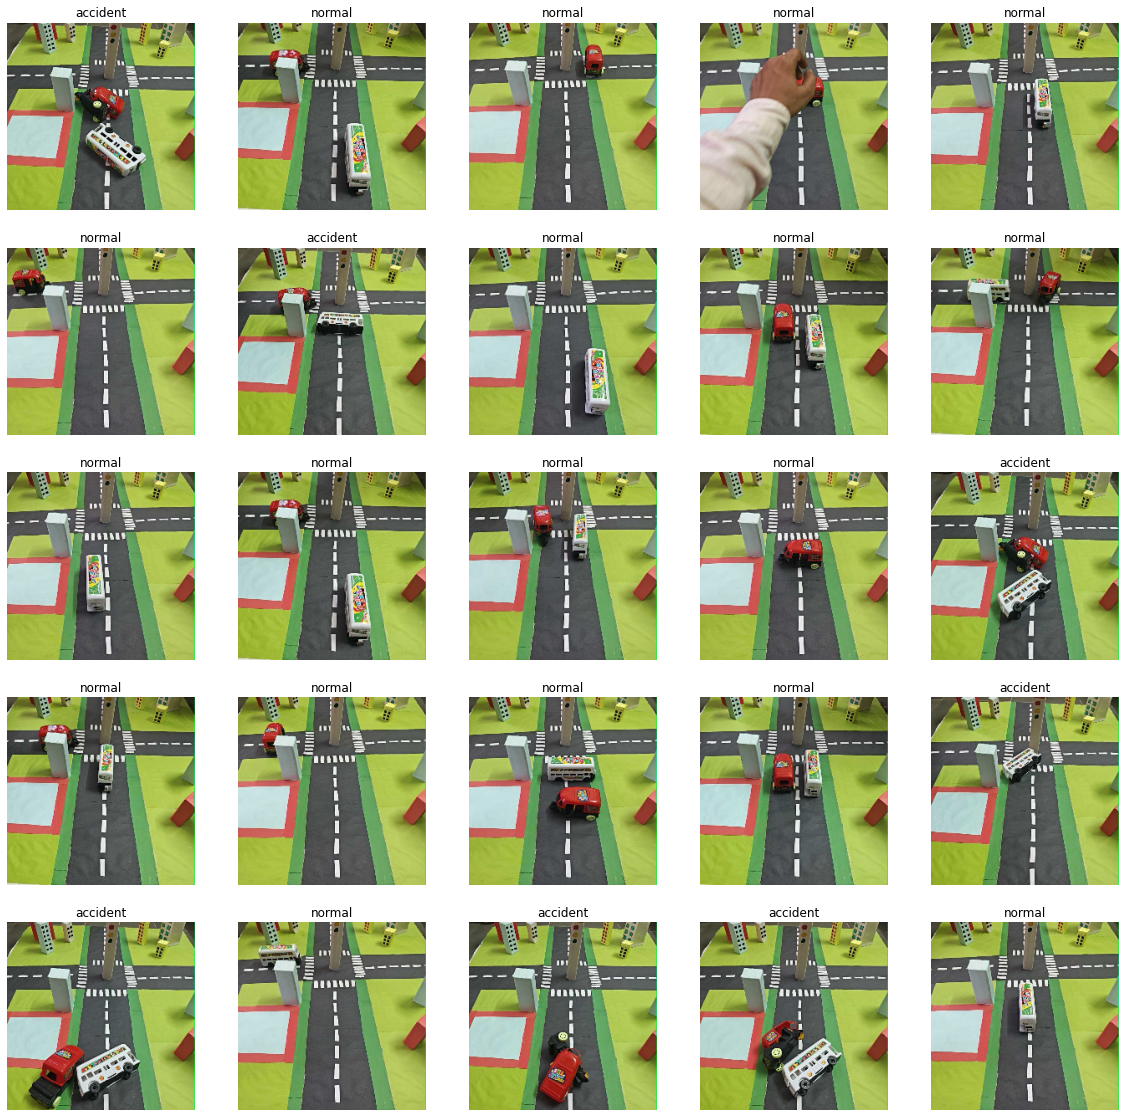

In [14]:
# Show Images

plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(imagePaths),25))) : 
    plt.subplot(5,5,n+1)
    plt.imshow(Data[i] , cmap='gray')
    plt.title(Target[i])
    plt.axis('off')     
plt.show()


In [15]:
# encode labels as integers

le = LabelEncoder()
labels = le.fit_transform(Target)
labels = to_categorical(labels)

print(le.classes_)
print(labels[0])

['accident' 'normal']
[1. 0.]


In [16]:
# split Data

(x_train, x_test, y_train, y_test) = train_test_split(Data, labels,test_size=0.20,
                                                      stratify=labels,random_state=42)

trainX = np.array(x_train)
testX = np.array(x_test)
trainY = np.array(y_train)
testY = np.array(y_test)

print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(357, 225, 225, 3)
(90, 225, 225, 3)
(357, 2)
(90, 2)


In [17]:
s = 225 # size

In [18]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size =(3,3), activation = "relu", input_shape=(s,s,3), kernel_initializer='he_normal',))
# model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size =(3,3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 128, kernel_size =(3,3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2), strides = (1,1)))

model.add(Dropout(0.25))

#fully connected
model.add(Flatten())
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(2, activation = "softmax"))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [19]:
# Compile 

model.compile(optimizer = keras.optimizers.Adam(),
              loss= keras.losses.categorical_crossentropy,
              metrics= ['accuracy'])

In [20]:
# Model Details

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 223, 223, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 51, 51, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 51, 51, 128)      

In [21]:
epochs = 8

history = model.fit(trainX, trainY, epochs=epochs, batch_size=40, verbose=1)


Epoch 1/8
357/357 [==============================] - 10s 29ms/step - loss: 14.1572 - accuracy: 0.5826
Epoch 2/8
357/357 [==============================] - 10s 27ms/step - loss: 0.0429 - accuracy: 0.9832
Epoch 3/8
357/357 [==============================] - 9s 26ms/step - loss: 0.0203 - accuracy: 0.9916
Epoch 4/8
357/357 [==============================] - 9s 27ms/step - loss: 0.0097 - accuracy: 0.9944
Epoch 5/8
357/357 [==============================] - 9s 26ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 6/8
357/357 [==============================] - 10s 27ms/step - loss: 1.5755e-05 - accuracy: 1.0000
Epoch 7/8
357/357 [==============================] - 10s 27ms/step - loss: 1.8864e-05 - accuracy: 1.0000
Epoch 8/8
357/357 [==============================] - 10s 27ms/step - loss: 1.0376e-05 - accuracy: 1.0000


In [22]:
modelLoss, modelAccuracy = model.evaluate(testX, testY, verbose=0)

print('Test Loss is {}'.format(modelLoss))
print('Test Accuracy is {}'.format(modelAccuracy))

Test Loss is 5.53659373912928e-07
Test Accuracy is 1.0


In [23]:
class_names = ['accident', 'normal']

y_pred = model.predict(testX)
print(class_names[np.argmax(y_pred[1])])

normal


In [24]:
# classification report on train
batch_size=40

predIdxs = model.predict (trainX, batch_size=batch_size)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(trainY.argmax(axis=1), predIdxs, target_names=le.classes_, digits = 5))

              precision    recall  f1-score   support

    accident    1.00000   1.00000   1.00000       152
      normal    1.00000   1.00000   1.00000       205

    accuracy                        1.00000       357
   macro avg    1.00000   1.00000   1.00000       357
weighted avg    1.00000   1.00000   1.00000       357



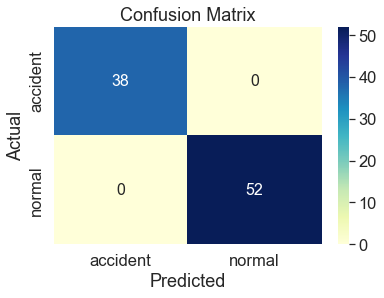

In [25]:
# Plotting Confusion Matrix
x = confusion_matrix(testY.argmax(axis=1),y_pred.argmax(axis=1))
Confusion_Matrix = pd.DataFrame(x, index=class_names, columns=class_names)

sns.set(font_scale=1.5, color_codes=True, palette='deep')
sns.heatmap(Confusion_Matrix, annot=True, annot_kws={'size':16}, fmt='d', cmap='YlGnBu')

plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title('Confusion Matrix')
plt.show()

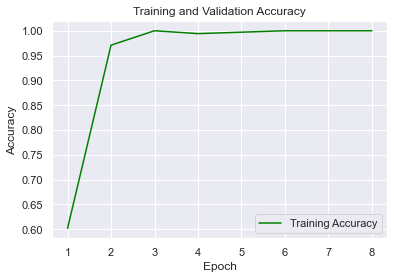

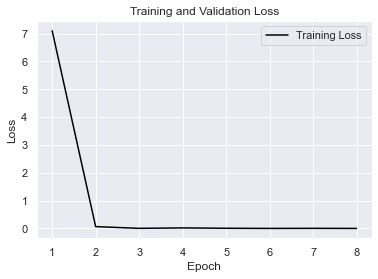

In [19]:
#plotting training values
sns.set()

acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='black', label='Training Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [20]:


model.save("model.h5")

[0]
accident


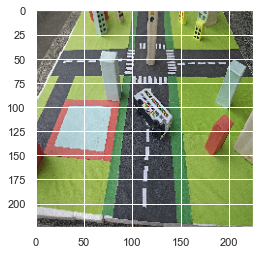

In [21]:
from keras.preprocessing import image
#example 2
image_path = "dataset/accident/IMG_20250429_141826633.jpg"
new_img = image.load_img(image_path, target_size=(225, 225))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(class_names[prediction[0]])
plt.imshow(new_img)